# Wine_cleaning

In [38]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
# Import data
wine_data_df = pd.read_csv("Data/winemag-data-130k-v2.csv")  
print(wine_data_df.shape)
wine_data_df.head()

(129971, 14)


Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

## Select and keep only US data

In [40]:
# Only keep rows where country = US
US_wine_data_df = wine_data_df.loc[wine_data_df["country"] == "US"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 14)


Unnamed: 0 country                                        description  \
2            2      US  Tart and snappy, the flavors of lime flesh and...   
3            3      US  Pineapple rind, lemon pith and orange blossom ...   
4            4      US  Much like the regular bottling from 2012, this...   
10          10      US  Soft, supple plum envelopes an oaky structure ...   
12          12      US  Slightly reduced, this wine offers a chalky, t...   

                           designation  points  price    province  \
2                                  NaN      87   14.0      Oregon   
3                 Reserve Late Harvest      87   13.0    Michigan   
4   Vintner's Reserve Wild Child Block      87   65.0      Oregon   
10                      Mountain Cuvée      87   19.0  California   
12                                 NaN      87   34.0  California   

               region_1           region_2         taster_name  \
2     Willamette Valley  Willamette Valley        Paul Gregutt   
3   Lake Michigan Shore                NaN  Alexander Peartree   
4     Willamette Valley  Willamette Valley        Paul Gregutt   
10          Napa Valley               Napa      Virginie Boone   
12     Alexander Valley             Sonoma      Virginie Boone   

   taster_twitter_handle                                              title  \
2            @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                    NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4            @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
10               @vboone  Kirkland Signature 2011 Mountain Cuvée Caberne...   
12               @vboone  Louis M. Martini 2012 Cabernet Sauvignon (Alex...   

               variety              winery  
2           Pinot Gris           Rainstorm  
3             Riesling          St. Julian  
4           Pinot Noir        Sweet Cheeks  
10  Cabernet Sauvignon  Kirkland Signature  
12  Cabernet Sauvignon    Louis M. Martini

In [41]:
# Drop columns that are not useful: Unnamed: 0, country, taster_name, taster_twitter_handle
US_wine_data_df = US_wine_data_df.drop(columns=["Unnamed: 0", "country","taster_name", "taster_twitter_handle"], axis=1)
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 10)


description  \
2   Tart and snappy, the flavors of lime flesh and...   
3   Pineapple rind, lemon pith and orange blossom ...   
4   Much like the regular bottling from 2012, this...   
10  Soft, supple plum envelopes an oaky structure ...   
12  Slightly reduced, this wine offers a chalky, t...   

                           designation  points  price    province  \
2                                  NaN      87   14.0      Oregon   
3                 Reserve Late Harvest      87   13.0    Michigan   
4   Vintner's Reserve Wild Child Block      87   65.0      Oregon   
10                      Mountain Cuvée      87   19.0  California   
12                                 NaN      87   34.0  California   

               region_1           region_2  \
2     Willamette Valley  Willamette Valley   
3   Lake Michigan Shore                NaN   
4     Willamette Valley  Willamette Valley   
10          Napa Valley               Napa   
12     Alexander Valley             Sonoma   

                                                title             variety  \
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   

                winery  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini

## Evaluate data and clean

In [42]:
# Look at info.
US_wine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  54504 non-null  object 
 1   designation  36908 non-null  object 
 2   points       54504 non-null  int64  
 3   price        54265 non-null  float64
 4   province     54504 non-null  object 
 5   region_1     54226 non-null  object 
 6   region_2     50511 non-null  object 
 7   title        54504 non-null  object 
 8   variety      54504 non-null  object 
 9   winery       54504 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.6+ MB


In [43]:
# Drop additional column that is not going to be useful: 
# "designation", which is the vineyard where grapes are from.  17,596 null -> 32% null values
# Doesn't seem likely that we'll need this information later.
US_wine_data_df = US_wine_data_df.drop(columns=["designation"], axis=1)
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 9)


description  points  price  \
2   Tart and snappy, the flavors of lime flesh and...      87   14.0   
3   Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4   Much like the regular bottling from 2012, this...      87   65.0   
10  Soft, supple plum envelopes an oaky structure ...      87   19.0   
12  Slightly reduced, this wine offers a chalky, t...      87   34.0   

      province             region_1           region_2  \
2       Oregon    Willamette Valley  Willamette Valley   
3     Michigan  Lake Michigan Shore                NaN   
4       Oregon    Willamette Valley  Willamette Valley   
10  California          Napa Valley               Napa   
12  California     Alexander Valley             Sonoma   

                                                title             variety  \
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   

                winery  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini

In [59]:
# Make a copy of the dataframe
US_wine_data_df_copy = US_wine_data_df
US_wine_data_df_copy.shape

(54504, 9)

In [60]:
# Replace NaN in region_1 with corresponding value from same row in province
# https://stackoverflow.com/questions/49019230/replace-nan-in-one-column-with-the-value-from-another-column-in-pandas-whats-w
US_wine_data_df_copy['region_1'] = US_wine_data_df.apply(lambda row: row['province'] if pd.isnull(row['region_1']) else row['region_1'], axis=1)

In [61]:
# Replace NaN in region_2 with corresponding value from same row in region_1
# https://stackoverflow.com/questions/49019230/replace-nan-in-one-column-with-the-value-from-another-column-in-pandas-whats-w
US_wine_data_df_copy['region_2'] = US_wine_data_df.apply(lambda row: row['region_1'] if pd.isnull(row['region_2']) else row['region_2'], axis=1)
US_wine_data_df_copy.head()

description  points  price  \
2   Tart and snappy, the flavors of lime flesh and...      87   14.0   
3   Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4   Much like the regular bottling from 2012, this...      87   65.0   
10  Soft, supple plum envelopes an oaky structure ...      87   19.0   
12  Slightly reduced, this wine offers a chalky, t...      87   34.0   

      province             region_1             region_2  \
2       Oregon    Willamette Valley    Willamette Valley   
3     Michigan  Lake Michigan Shore  Lake Michigan Shore   
4       Oregon    Willamette Valley    Willamette Valley   
10  California          Napa Valley                 Napa   
12  California     Alexander Valley               Sonoma   

                                                title             variety  \
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   

                winery  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini

In [62]:
# Look at dataframe info again.
US_wine_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  54504 non-null  object 
 1   points       54504 non-null  int64  
 2   price        54265 non-null  float64
 3   province     54504 non-null  object 
 4   region_1     54504 non-null  object 
 5   region_2     54504 non-null  object 
 6   title        54504 non-null  object 
 7   variety      54504 non-null  object 
 8   winery       54504 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.2+ MB


In [63]:
# Drop rows with NaN.  Max rows US =54504
# "price" only has 54226 rows.  It will only reduce data by 1/2%
US_wine_data_df_copy = US_wine_data_df_copy.dropna()
print(US_wine_data_df_copy.shape)
US_wine_data_df_copy.head()

(54265, 9)


description  points  price  \
2   Tart and snappy, the flavors of lime flesh and...      87   14.0   
3   Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4   Much like the regular bottling from 2012, this...      87   65.0   
10  Soft, supple plum envelopes an oaky structure ...      87   19.0   
12  Slightly reduced, this wine offers a chalky, t...      87   34.0   

      province             region_1             region_2  \
2       Oregon    Willamette Valley    Willamette Valley   
3     Michigan  Lake Michigan Shore  Lake Michigan Shore   
4       Oregon    Willamette Valley    Willamette Valley   
10  California          Napa Valley                 Napa   
12  California     Alexander Valley               Sonoma   

                                                title             variety  \
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   

                winery  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini

### Bucketing price

In [64]:
price_counts = US_wine_data_df_copy.price.value_counts()
price_counts

25.0     2860
20.0     2736
30.0     2613
35.0     2240
40.0     2157
         ... 
138.0       1
400.0       1
147.0       1
104.0       1
117.0       1
Name: price, Length: 160, dtype: int64

<AxesSubplot:ylabel='Density'>

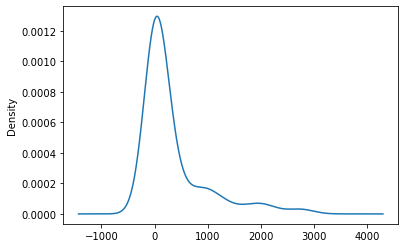

In [65]:
price_counts.plot.density()

In [66]:
# Create price bins
price_bins = [0, 15, 30, 60, 100, 500, 10000]
US_wine_data_df_copy.groupby(pd.cut(US_wine_data_df_copy["price"], price_bins)).count()

price_bins_names = ["<$15","$15-30","$30-60","$60-100", "100-500","too much"]

# Make a new column in dataframe for price bins.
US_wine_data_df_copy["price_bins"] = pd.cut(US_wine_data_df_copy["price"], price_bins, labels=price_bins_names)

# Check dataframe
US_wine_data_df_copy.tail()

C:\Users\kayse\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


description  points  price  \
129945  Hailing from one of the more popular vineyards...      90   20.0   
129949  There's no bones about the use of oak in this ...      90   35.0   
129950  This opens with herbaceous dollops of thyme an...      90   35.0   
129952  This Zinfandel from the eastern section of Nap...      90   22.0   
129967  Citation is given as much as a decade of bottl...      90   75.0   

          province           region_1       region_2  \
129945  California  Santa Ynez Valley  Central Coast   
129949  California        Napa Valley           Napa   
129950  California        Napa Valley           Napa   
129952  California      Chiles Valley           Napa   
129967      Oregon             Oregon   Oregon Other   

                                                    title       variety  \
129945  Birichino 2013 Jurassic Park Vineyard Old Vine...  Chenin Blanc   
129949  Flora Springs 2013 Barrel Fermented Chardonnay...    Chardonnay   
129950  Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley)     Zinfandel   
129952             Houdini 2011 Zinfandel (Chiles Valley)     Zinfandel   
129967                  Citation 2004 Pinot Noir (Oregon)    Pinot Noir   

               winery price_bins  
129945      Birichino     $15-30  
129949  Flora Springs     $30-60  
129950         Hendry     $30-60  
129952        Houdini     $15-30  
129967       Citation    $60-100

In [67]:
# Create a DataFrame to hold columns that won't be used in machine learning in case we want them later
US_wine_data_title_df = US_wine_data_df_copy.drop(columns=["points", "region_1", "variety","price_bins"], axis=1)
print(US_wine_data_title_df.shape)
US_wine_data_title_df.head()

(54265, 6)


description  price    province  \
2   Tart and snappy, the flavors of lime flesh and...   14.0      Oregon   
3   Pineapple rind, lemon pith and orange blossom ...   13.0    Michigan   
4   Much like the regular bottling from 2012, this...   65.0      Oregon   
10  Soft, supple plum envelopes an oaky structure ...   19.0  California   
12  Slightly reduced, this wine offers a chalky, t...   34.0  California   

               region_2                                              title  \
2     Willamette Valley      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3   Lake Michigan Shore  St. Julian 2013 Reserve Late Harvest Riesling ...   
4     Willamette Valley  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
10                 Napa  Kirkland Signature 2011 Mountain Cuvée Caberne...   
12               Sonoma  Louis M. Martini 2012 Cabernet Sauvignon (Alex...   

                winery  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini

In [68]:
# Drop additional columns that we may want back later: "description" - of flavors, i.e. tart and snappy, oaky, etc.
# "title" - name on the bottle; region_1, region_2

US_wine_data_df_ml = US_wine_data_df_copy.drop(columns=["description", "price", "province", "region_2", "title", "winery"], axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

(54265, 4)


points             region_1             variety price_bins
2       87    Willamette Valley          Pinot Gris       <$15
3       87  Lake Michigan Shore            Riesling       <$15
4       87    Willamette Valley          Pinot Noir    $60-100
10      87          Napa Valley  Cabernet Sauvignon     $15-30
12      87     Alexander Valley  Cabernet Sauvignon     $30-60

In [69]:
# Save cleaned dataframes
# All US data after drop Na
US_wine_data_df_copy.to_csv("Data/US_wine_data.csv", index=False)

# Save columns to add back in later ("description", "title", "region_1", "region_2")
US_wine_data_title_df.to_csv("Data/US_wine_data_title.csv", index=False)

# Save columns for machine learning ("points","price","province","variety","winery")
US_wine_data_df_ml.to_csv("Data/US_wine_data_ml.csv", index=False)


## Starting point for machine learning preprocessing

In [88]:
# Import data
US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_ml.csv")

In [89]:
US_wine_data_df_ml.nunique()

points         21
region_1      266
variety       257
price_bins      6
dtype: int64

In [90]:
# Determine value_counts for binning
variety_counts = US_wine_data_df_ml.variety.value_counts()
variety_counts

Pinot Noir                  9857
Cabernet Sauvignon          7280
Chardonnay                  6773
Syrah                       3232
Red Blend                   2948
                            ... 
Prosecco                       1
Kerner                         1
Madeira Blend                  1
Tannat-Syrah                   1
Roussanne-Grenache Blanc       1
Name: variety, Length: 257, dtype: int64

<AxesSubplot:ylabel='Density'>

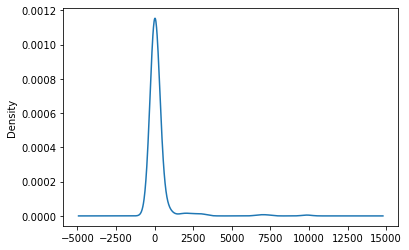

In [91]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [92]:
# Determine which values to replace.  Per the plot, we tried <500 but after looking
# results we decided that we wanted to be more inclusive since some mainstream wines
# would be binned in "other".  Therefore we lowered the threshold for other to 300.
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    US_wine_data_df_ml.variety = US_wine_data_df_ml.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.variety.value_counts()

Pinot Noir                  9857
Cabernet Sauvignon          7280
Chardonnay                  6773
Other                       4569
Syrah                       3232
Red Blend                   2948
Zinfandel                   2705
Merlot                      2300
Sauvignon Blanc             2154
Bordeaux-style Red Blend    1817
Riesling                    1745
Cabernet Franc               999
Rosé                         900
Pinot Gris                   863
Viognier                     786
Petite Sirah                 745
Rhône-style Red Blend        690
Sparkling Blend              678
White Blend                  634
Malbec                       533
Grenache                     520
Sangiovese                   429
Gewürztraminer               405
Pinot Grigio                 360
Tempranillo                  343
Name: variety, dtype: int64

In [93]:
# Determine value_counts for binning
region_1_counts = US_wine_data_df_ml.region_1.value_counts()
region_1_counts

Napa Valley                               4475
Columbia Valley (WA)                      4109
Russian River Valley                      3090
California                                2629
Paso Robles                               2327
                                          ... 
McDowell Valley                              1
Monterey-San Luis Obispo-Santa Barbara       1
Sonoma-Napa-Mendocino                        1
Sonoma-Napa-Lake                             1
Monterey County-Napa County                  1
Name: region_1, Length: 266, dtype: int64

<AxesSubplot:ylabel='Density'>

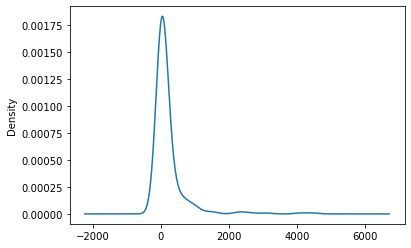

In [94]:
# Visualize the value counts of region_1
region_1_counts.plot.density()

In [95]:
# From the plot the curve breaks around 500.
replace_region_1 = list(region_1_counts[region_1_counts <= 300].index)

# Replace in dataframe
for region_1 in replace_region_1:
    US_wine_data_df_ml.region_1 = US_wine_data_df_ml.region_1.replace(region_1,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.region_1.value_counts()

Other                        9568
Napa Valley                  4475
Columbia Valley (WA)         4109
Russian River Valley         3090
California                   2629
Paso Robles                  2327
Willamette Valley            2296
Finger Lakes                 1556
Sonoma Coast                 1467
Sonoma County                1245
Walla Walla Valley (WA)      1061
Carneros                      999
Santa Barbara County          994
Yakima Valley                 984
Sta. Rita Hills               971
Dry Creek Valley              936
Santa Ynez Valley             806
Santa Lucia Highlands         802
Lodi                          799
Alexander Valley              780
Central Coast                 737
Red Mountain                  719
Santa Maria Valley            701
Sonoma Valley                 660
Anderson Valley               646
North Fork of Long Island     596
Dundee Hills                  554
Horse Heaven Hills            554
Virginia                      552
Santa Cruz Mou

### Encode categorical data

In [96]:
# Create variable to hold categorical columns for OneHotEncoder
wine_cat = ["variety", "region_1"]

In [97]:
# from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(US_wine_data_df_ml[wine_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(wine_cat)
encode_df.shape
encode_df.head()

variety_Bordeaux-style Red Blend  variety_Cabernet Franc  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   

   variety_Cabernet Sauvignon  variety_Chardonnay  variety_Gewürztraminer  \
0                         0.0                 0.0                     0.0   
1                         0.0                 0.0                     0.0   
2                         0.0                 0.0                     0.0   
3                         1.0                 0.0                     0.0   
4                         1.0                 0.0                     0.0   

   variety_Grenache  variety_Malbec  variety_Merlot  variety_Other  \
0               0.0             0.0             0.0            0.0   
1               0.0             0.0             0.0            0.0   
2               0.0             0.0             0.0            0.0   
3               0.0             0.0             0.0            0.0   
4               0.0             0.0             0.0            0.0   

   variety_Petite Sirah  ...  region_1_Sonoma Coast  region_1_Sonoma County  \
0                   0.0  ...                    0.0                     0.0   
1                   0.0  ...                    0.0                     0.0   
2                   0.0  ...                    0.0                     0.0   
3                   0.0  ...                    0.0                     0.0   
4                   0.0  ...                    0.0                     0.0   

   region_1_Sonoma Valley  region_1_Sta. Rita Hills  region_1_Virginia  \
0                     0.0                       0.0                0.0   
1                     0.0                       0.0                0.0   
2                     0.0                       0.0                0.0   
3                     0.0                       0.0                0.0   
4                     0.0                       0.0                0.0   

   region_1_Wahluke Slope  region_1_Walla Walla Valley (WA)  \
0                     0.0                               0.0   
1                     0.0                               0.0   
2                     0.0                               0.0   
3                     0.0                               0.0   
4                     0.0                               0.0   

   region_1_Washington  region_1_Willamette Valley  region_1_Yakima Valley  
0                  0.0                         1.0                     0.0  
1                  0.0                         0.0                     0.0  
2                  0.0                         1.0                     0.0  
3                  0.0                         0.0                     0.0  
4                  0.0                         0.0                     0.0  

[5 rows x 71 columns]

In [98]:
# Merge one-hot encoded features and drop the originals
US_wine_data_df_ml = US_wine_data_df_ml.merge(encode_df,left_index=True, right_index=True)
US_wine_data_df_ml = US_wine_data_df_ml.drop(wine_cat,axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

(54265, 73)


points price_bins  variety_Bordeaux-style Red Blend  \
0      87       <$15                               0.0   
1      87       <$15                               0.0   
2      87    $60-100                               0.0   
3      87     $15-30                               0.0   
4      87     $30-60                               0.0   

   variety_Cabernet Franc  variety_Cabernet Sauvignon  variety_Chardonnay  \
0                     0.0                         0.0                 0.0   
1                     0.0                         0.0                 0.0   
2                     0.0                         0.0                 0.0   
3                     0.0                         1.0                 0.0   
4                     0.0                         1.0                 0.0   

   variety_Gewürztraminer  variety_Grenache  variety_Malbec  variety_Merlot  \
0                     0.0               0.0             0.0             0.0   
1                     0.0               0.0             0.0             0.0   
2                     0.0               0.0             0.0             0.0   
3                     0.0               0.0             0.0             0.0   
4                     0.0               0.0             0.0             0.0   

   ...  region_1_Sonoma Coast  region_1_Sonoma County  region_1_Sonoma Valley  \
0  ...                    0.0                     0.0                     0.0   
1  ...                    0.0                     0.0                     0.0   
2  ...                    0.0                     0.0                     0.0   
3  ...                    0.0                     0.0                     0.0   
4  ...                    0.0                     0.0                     0.0   

   region_1_Sta. Rita Hills  region_1_Virginia  region_1_Wahluke Slope  \
0                       0.0                0.0                     0.0   
1                       0.0                0.0                     0.0   
2                       0.0                0.0                     0.0   
3                       0.0                0.0                     0.0   
4                       0.0                0.0                     0.0   

   region_1_Walla Walla Valley (WA)  region_1_Washington  \
0                               0.0                  0.0   
1                               0.0                  0.0   
2                               0.0                  0.0   
3                               0.0                  0.0   
4                               0.0                  0.0   

   region_1_Willamette Valley  region_1_Yakima Valley  
0                         1.0                     0.0  
1                         0.0                     0.0  
2                         1.0                     0.0  
3                         0.0                     0.0  
4                         0.0                     0.0  

[5 rows x 73 columns]

In [99]:
# Save preprocessed dataframe to csv for future reference.
US_wine_data_df_ml.to_csv("Data/US_wine_data_enc.csv", index=False)

In [100]:
# Import data
US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_enc.csv")

### Split preprocessed data 

In [101]:
# from sklearn.model_selection import train_test_split
# Split preprocessed data into our features and target arrays
#  Target
y = US_wine_data_df_ml["price_bins"].values
# Features
X = US_wine_data_df_ml.drop(["price_bins"],axis=1).values

In [102]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [103]:
# from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [104]:
print(X_train_scaled [0:5])

[[ 1.7447257  -0.18748622 -0.13627336 -0.39263251 -0.37863285 -0.08675177
  -0.09669522 -0.10100397 -0.2118444  -0.30298795 -0.11693615 -0.07971786
  -0.12407186  2.12635075 -0.24094144 -0.1137647  -0.18114385 -0.12878626
  -0.08646379 -0.2036718  -0.11332066 -0.25468221 -0.07734215 -0.12294403
  -0.1119785  -0.22727754 -0.12107719 -0.08617488 -0.10738964 -0.22475533
  -0.13701973 -0.11801104 -0.08002942 -0.28744384 -0.13305798 -0.10100397
  -0.08559422 -0.07456046 -0.17204439 -0.10075542 -0.08958218 -0.12139021
  -0.08156985 -0.08486296 -0.0794051  -0.07877596 -0.30231076 -0.08187454
  -0.10633115 -0.09232853 -0.46208804 -0.21006536 -0.11519662 -0.08456874
   4.05794933 -0.08617488 -0.13877747 -0.10087977 -0.12284102 -0.11332066
  -0.12294403 -0.08703883 -0.16674872 -0.15384664 -0.11141474 -0.13467458
  -0.1016228  -0.08018476 -0.14178246 -0.08972143 -0.20750193 -0.13636686]
 [ 1.42378935 -0.18748622 -0.13627336 -0.39263251 -0.37863285 -0.08675177
  10.34177232 -0.10100397 -0.2118444 

## Machine Learning

### Try RandomForestClassifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [106]:
# Create a random forest classifier. 
rf_model = RandomForestClassifier(n_estimators=500, random_state=42) 

In [107]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [108]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [109]:
predictions

array(['$30-60', '$15-30', '$15-30', ..., '$30-60', '$30-60', '$15-30'],
      dtype=object)

In [110]:
predictions.shape

(13567,)

In [113]:
from sklearn.metrics import multilabel_confusion_matrix
# Calculating the confusion matrix
predicted_labels = US_wine_data_df_ml["price_bins"].unique().tolist()

cm = multilabel_confusion_matrix(y_test, predictions,labels=predicted_labels) 
# cm = multilabel_confusion_matrix(y_test, predictions) 

In [114]:
predicted_labels

['<$15', '$60-100', '$15-30', '$30-60', '100-500', 'too much']

In [115]:
cm

array([[[11446,   450],
        [  849,   822]],

       [[12027,   363],
        [  908,   269]],

       [[ 5899,  2290],
        [ 1757,  3621]],

       [[ 6274,  2228],
        [ 1660,  3405]],

       [[13229,    64],
        [  221,    53]],

       [[13563,     2],
        [    2,     0]]], dtype=int64)

In [116]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.6021965062283482

In [117]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.6021965062283482
Classification Report
              precision    recall  f1-score   support

      $15-30       0.61      0.67      0.64      5378
      $30-60       0.60      0.67      0.64      5065
     $60-100       0.43      0.23      0.30      1177
     100-500       0.45      0.19      0.27       274
        <$15       0.65      0.49      0.56      1671
    too much       0.00      0.00      0.00         2

    accuracy                           0.60     13567
   macro avg       0.46      0.38      0.40     13567
weighted avg       0.59      0.60      0.59     13567

